<a href="https://colab.research.google.com/github/mcarmona8/Business_Case/blob/main/Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Case Accenture**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

**Reading Files**

In [2]:


filename_='analytics-case-study-data.csv'
original_df = pd.read_csv(filename_)  # Replace with your file path
original_df.count()


,0
Campaign ID,1000
Campaign Name,1000
Prospect Status,1000
Account ID,1000
Account Name,1000
domain,1000
Country,1000
Prospect ID,1000
Opt-In,986
Opt-In Source,875


**Converting Dates**

In [3]:

df_cleaned = original_df.copy()
#df_cleaned = df_cleaned.dropna(subset=["Opt-In Timestamp"])
df_cleaned["Opt-In Timestamp"] = pd.to_datetime(df_cleaned["Opt-In Timestamp"], errors="coerce")
# Fixing Dates > 2024. This is an assumption
df_cleaned["Opt-In Timestamp"] = df_cleaned["Opt-In Timestamp"].apply(lambda x: x.replace(year=2023) if x.year > 2023 else x)
df_cleaned

<ipython-input-3-171edaac97d9>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned["Opt-In Timestamp"] = pd.to_datetime(df_cleaned["Opt-In Timestamp"], errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Campaign ID,Campaign Name,Prospect Status,Account ID,Account Name,domain,Country,Prospect ID,Opt-In,Opt-In Source,Opt-In Timestamp,Opt-Out Timestamp,Job Title,Prospect Source
0,FY23-Q3-global-PROD461-valentines_day_special,Valentine's Day Special,No Show,0014M0000mXuCYxQAN,Alpha Innovations,alphainnov.biz,Italy,0034M0000qUkSoNQAV,Yes,online purchase,2023-06-23 06:11:00,NaN,Senior Managed Care Social Media,Advertisement
1,FY23-Q3-global-PROD461-annual_clearance_event,Annual Clearance Event,Responded,0014M0000mXuCYxQAN,Alpha Innovations,alphainnov.biz,Italy,0034M0000HOb6cnQAD,Yes,social media campaign,NaT,11/26/23 6:11,SENIOR ANALYST,Trade Show
2,FY23-Q3-global-PROD461-spring_flower_sale,Spring Flower Sale,No Show,0014M0000mXuCYxQAN,Alpha Innovations,alphainnov.biz,Italy,0034M0000rRLR2bQAX,Yes,referral program,NaT,7/21/23 6:11,Data- Bij DE Gemeente Leeuwarden Analyst,Referral
3,FY23-Q3-global-PROD461-spring_break_sale,Spring Break Sale,No Show,0014M0000mXuCYxQAN,Alpha Innovations,alphainnov.biz,Italy,0034M0000hRZsn9QAD,Yes,event registration,NaT,7/11/23 6:11,Data Analyst,Trade Show
4,FY23-Q3-global-PROD461-spring_flower_sale,Spring Flower Sale,No Show,0014M0000mXuCYxQAN,Alpha Innovations,alphainnov.biz,Italy,0034M0000pVvfBmQAJ,Yes,event registration,NaT,11/26/23 6:11,Data Scientist / Analyst / Engineer,Advertisement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,FY23-Q3-global-PROD461-cyber_monday_sale,Cyber Monday Sale,Attended,0014M0000Ri9Qe6QAF,Zenith Solutions,zenithsolutions.net,China,0034M0000pp1pUeQAI,Yes,NaN,2023-05-02 06:11:00,NaN,Senior Analyst,Advertisement
996,FY23-Q3-global-PROD461-cyber_monday_blowout,Cyber Monday Blowout,No Show,0014M0000Ri9Qe6QAF,Zenith Solutions,zenithsolutions.net,China,0034M0000qcA3rMQAV,Yes,NaN,2023-02-11 06:11:00,NaN,IT Business Analyst,Advertisement
997,FY23-Q3-global-PROD461-fall_into_savings,Fall Into Savings,No Show,0014M0000Ri9Qe6QAF,Zenith Solutions,zenithsolutions.net,China,0034M0000qVJd4KQAZ,Yes,referral program,2023-06-15 06:11:00,NaN,Systems Operations Analyst II (Americas),Advertisement
998,FY23-Q3-global-PROD461-cyber_monday_blowout,Cyber Monday Blowout,No Show,0014M0000Ri9Qe6QAF,Zenith Solutions,zenithsolutions.net,China,0034M0000o1vNNiQAM,Yes,social media campaign,2023-08-10 06:11:00,NaN,Tools & Technology Lead Senior Data Analyst,Advertisement


**Show me the uniques per Column**

In [4]:
uniques_=df_cleaned.nunique()
print(uniques_)


Campaign ID           81
Campaign Name         81
Prospect Status        4
Account ID           126
Account Name          47
domain                50
Country               13
Prospect ID          997
Opt-In                 2
Opt-In Source          8
Opt-In Timestamp     163
Opt-Out Timestamp     25
Job Title            724
Prospect Source        4
dtype: int64


**Opt-In Source Only**

In [5]:
df_cleaned["Opt-In Source"].unique()

array(['online purchase', 'social media campaign', 'referral program',
       'event registration', 'newsletter subscription',
       'online contest entry', nan, 'email subscription', 'website form'],
      dtype=object)

**Just Checking the time span**

In [6]:
time_stmap=df_cleaned["Opt-In Timestamp"].dropna()

print(time_stmap.max(), time_stmap.min())
time_stmap.count()

2023-12-18 06:11:00 2023-01-20 06:11:00


954

**Checking the Prospect Status**

In [7]:
list_values=df_cleaned['Prospect Status'].unique()
print(list_values)

['No Show' 'Responded' 'Registered' 'Attended']


**Checking the Prospect Status Distribution**

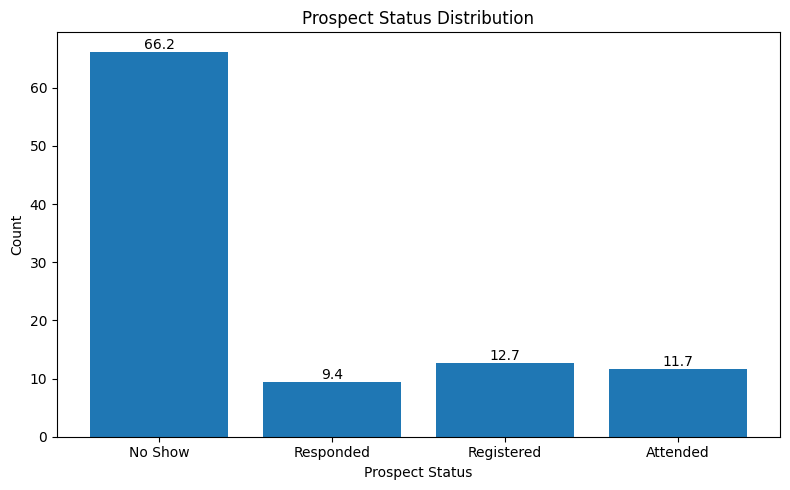

[662, 94, 127, 117]


In [8]:
#
#count_attended = (df_cleaned["Prospect Status"] == "Attended").sum()
count_dict = df_cleaned["Prospect Status"].value_counts().to_dict()
count_values = {status: count_dict.get(status, 0) for status in list_values}


# Data
categories = list_values
values = list(count_values.values())
total=sum(values)
values_perc=[round(x * 100/total,1) for x in values]

# Create bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values_perc)


# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height),
             ha='center', va='bottom', fontsize=10)


# Labels and title
plt.xlabel("Prospect Status")
plt.ylabel("Count")
plt.title("Prospect Status Distribution")



# Display the chart
plt.tight_layout()
plt.show()
print(values)



**Getting Conversion rate per Prospect Source**

In [9]:

a=df_cleaned.groupby("Prospect Source")["Prospect Status"].apply(lambda x: (x == "Registered").sum())
b=df_cleaned.groupby("Prospect Source")["Prospect Status"].count()
merged_df = pd.merge(a, b, on="Prospect Source", how="left")
merged_df = merged_df.rename(columns={"Prospect Status_x": "Successfull", "Prospect Status_y": "Total"})
merged_df['Conversion_rate']=merged_df['Successfull']/merged_df['Total']*100
print(merged_df )
#print(merged_df['Successfull'].sum())
#print(merged_df['Total'].sum())

                 Successfull  Total  Conversion_rate
Prospect Source                                     
Advertisement            104    821        12.667479
Referral                  10     40        25.000000
Social Media               0     14         0.000000
Trade Show                13    125        10.400000


**Getting CR per Opt-IN Source**

In [10]:
a=b=merge_df=[]
a=df_cleaned.groupby("Opt-In Source")["Prospect Status"].apply(lambda x: (x == "Registered").sum())
b=df_cleaned.groupby("Opt-In Source")["Prospect Status"].count()
merged_df = pd.merge(a, b, on="Opt-In Source", how="left")
merged_df = merged_df.rename(columns={"Prospect Status_x": "Successfull", "Prospect Status_y": "Total"})
merged_df['Conversion_rate']=merged_df['Successfull']/merged_df['Total']*100
print(merged_df )
#print(merged_df['Successfull'].sum())
#print(merged_df['Total'].sum())

                         Successfull  Total  Conversion_rate
Opt-In Source                                               
email subscription                13     84        15.476190
event registration                10     84        11.904762
newsletter subscription           17    124        13.709677
online contest entry              15    124        12.096774
online purchase                   13    125        10.400000
referral program                  16    125        12.800000
social media campaign             16    125        12.800000
website form                      11     84        13.095238


**Country distribution**

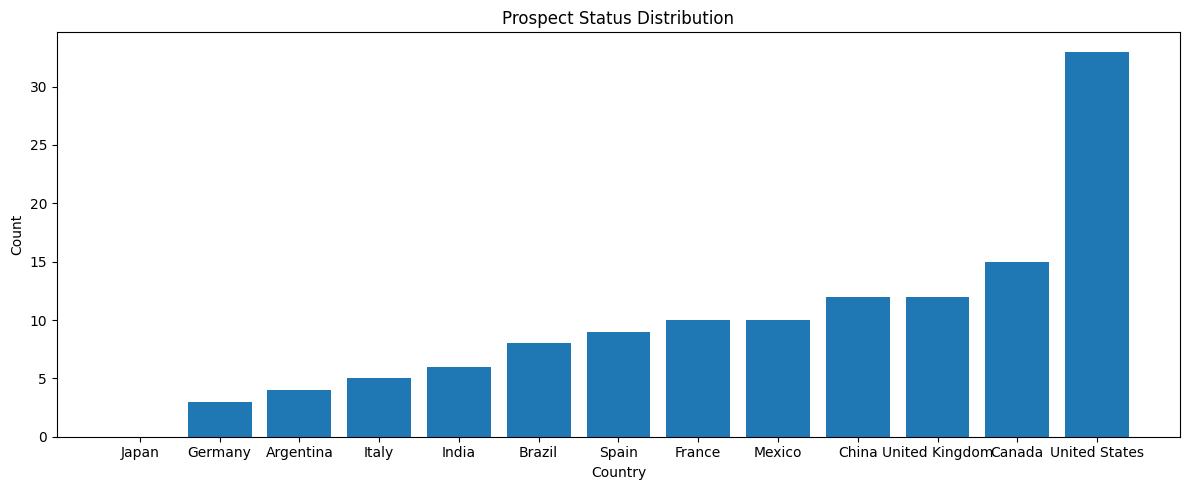

['Japan', 'Germany', 'Argentina', 'Italy', 'India', 'Brazil', 'Spain', 'France', 'Mexico', 'China', 'United Kingdom', 'Canada', 'United States']
[0, 3, 4, 5, 6, 8, 9, 10, 10, 12, 12, 15, 33]


In [11]:
a=b=[]
a=df_cleaned.groupby("Country")["Prospect Status"].apply(lambda x: (x == "Registered").sum())

a_df = a.reset_index()
a_df=a_df.sort_values(by="Prospect Status")

# Data
categories = a_df['Country'].tolist()
values = a_df['Prospect Status'].tolist()


# Create bar chart
plt.figure(figsize=(12, 5))
bars = plt.bar(categories, values)





# Labels and title
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Prospect Status Distribution")



# Display the chart
plt.tight_layout()
plt.show()
print(categories)
print(values)

**Classification Per Role**

In [12]:
def categorize_role(role_):
    role=role_.lower()
    practioneer_list=["specialist","analyst","senior","intern","lead","engineer","associate","coordinator" ]
    decision_list=["director","manager","head","consultant","partner","direktør","direcror" ]
    executive_list=["vp","chief","vice"]
    # if "analyst" in role or "specialist" in role or "senior" in role or "intern" in role or "lead" in role or "engineer" in role or "associate" in role:
    if any(word in role for word in decision_list):
        return "Decision Maker"
    elif any(word in role for word in executive_list):
        return "Executive"
    else:
        return "Practioneer"

df_cleaned.loc[:, "Role"] = df_cleaned["Job Title"].apply(categorize_role)

# print(df_cleaned[['Job Title','Role']])
print(df_cleaned[df_cleaned["Role"] == "Decision Maker"][["Job Title", "Role"]])
# print(df_cleaned[['Job Title','Role']].head(20))

                                             Job Title            Role
24                 "Senior Director, Data & Analytics"  Decision Maker
35                     Sr. Data & Analytics Consultant  Decision Maker
40        Director of Operational Strategy & Analytics  Decision Maker
45     Director Enterprise Strategy and Data Analytics  Decision Maker
48   Senior Director, Advanced Analytics & Data Sci...  Decision Maker
..                                                 ...             ...
973  "Manager, Data Measurement Reporting Governmen...  Decision Maker
975             "Director, Marketing Data & Analytics"  Decision Maker
977                         "Director, Data Analytics"  Decision Maker
988                Assistant Manager, People Analytics  Decision Maker
999  Business Analyst & Project Manager, Informatio...  Decision Maker

[176 rows x 2 columns]


**NEW Classification of Prospect Source**

In [13]:
def New_PS(source):
    source=source.lower()
    social_list=["social" ]
    referral_list=["referral" ]
    event_list=["event"]

    if any(word in source for word in social_list):
        return "Social Media"
    elif any(word in source for word in referral_list):
        return "Referral"
    elif any(word in source for word in event_list):
        return "Trade Show"
    else:
        return "Online"

# email subscription                13     84        15.476190
# event registration                10     84        11.904762
# newsletter subscription           17    124        13.709677
# online contest entry              15    124        12.096774
# online purchase                   13    125        10.400000
# referral program                  16    125        12.800000
# social media campaign             16    125        12.800000
# website form                      11     84        13.095238

**New Conversion Rate**

In [14]:
df_cleaned = df_cleaned.dropna(subset=["Opt-In Source"])
df_cleaned.loc[:, "New Prospect Source"] = df_cleaned["Opt-In Source"].apply(New_PS)
a=b=merge_df=[]
a=df_cleaned.groupby("New Prospect Source")["Prospect Status"].apply(lambda x: (x == "Registered").sum())
b=df_cleaned.groupby("New Prospect Source")["Prospect Status"].count()
merged_df = pd.merge(a, b, on="New Prospect Source", how="left")
merged_df = merged_df.rename(columns={"Prospect Status_x": "Successfull", "Prospect Status_y": "Total"})
merged_df['Conversion_rate']=merged_df['Successfull']/merged_df['Total']*100
print(merged_df )

                     Successfull  Total  Conversion_rate
New Prospect Source                                     
Online                        69    541        12.754159
Referral                      16    125        12.800000
Social Media                  16    125        12.800000
Trade Show                    10     84        11.904762


<ipython-input-14-ee602b66a268>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, "New Prospect Source"] = df_cleaned["Opt-In Source"].apply(New_PS)


**Plot Distribution per Role**

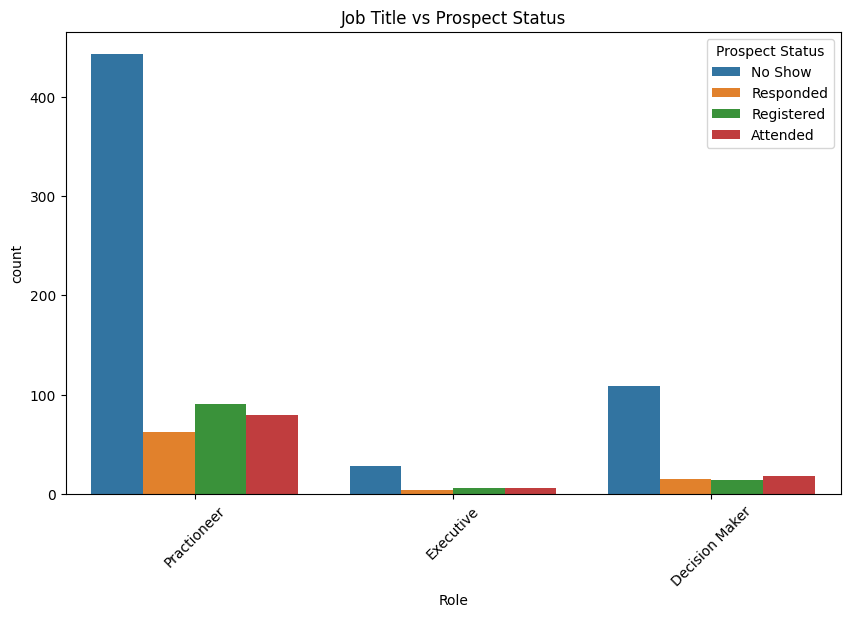

In [15]:
# Example: Check distribution of Prospect Status per Job Title
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x="Role", hue="Prospect Status")
plt.xticks(rotation=45)
plt.title("Job Title vs Prospect Status")
plt.show()

In [16]:
print((df_cleaned[df_cleaned["Role"] == "Decision Maker"]["Role"]).count())
print((df_cleaned[df_cleaned["Role"] == "Practioneer"]["Role"]).count())
print((df_cleaned[df_cleaned["Role"] == "Executive"]["Role"]).count())

156
675
44


In [17]:
c= df_cleaned[
    (df_cleaned["Prospect Status"] == "Registered") &
    (df_cleaned["Role"] == "Practioneer")
].groupby("Prospect Source")["Prospect Status"].count()

d= df_cleaned[
    (df_cleaned["Prospect Status"] == "Registered") &
    (df_cleaned["Role"] == "Decision Maker")
].groupby("Prospect Source")["Prospect Status"].count()

e= df_cleaned[
    (df_cleaned["Prospect Status"] == "Registered") &
    (df_cleaned["Role"] == "Executive")
].groupby("Prospect Source")["Prospect Status"].count()


merged_df1 = pd.merge(c, d, on="Prospect Source", how="left")

merged_df2 = pd.merge(merged_df1, e, on="Prospect Source", how="left")

merged_df2 = merged_df2.rename(columns={"Prospect Status_x": "Practioneer", "Prospect Status_y": "Decision Maker","Prospect Status": "Executive"})
merged_df2=merged_df2.fillna(0)
print(merged_df2)
#print(merged_df2.sum())

                 Practioneer  Decision Maker  Executive
Prospect Source                                        
Advertisement             75               9        6.0
Referral                   6               4        0.0
Trade Show                10               1        0.0


In [18]:

# merged_df = pd.merge(merged_df, merged_df2, on="Prospect Source", how="left")

# merged_df=merged_df.drop("Executive",axis=1)
print(merged_df)

                     Successfull  Total  Conversion_rate
New Prospect Source                                     
Online                        69    541        12.754159
Referral                      16    125        12.800000
Social Media                  16    125        12.800000
Trade Show                    10     84        11.904762


**Conversion Rate per Op-In Source**

In [19]:
c=d=e=[]
c= df_cleaned[
    (df_cleaned["Prospect Status"] == "Registered") &
    (df_cleaned["Prospect Source"] == "Advertisement")
].groupby("Opt-In Source")["Prospect Status"].count()

d= df_cleaned[
    (df_cleaned["Prospect Status"] == "Registered") &
     (df_cleaned["Prospect Source"] == "Referral")
].groupby("Opt-In Source")["Prospect Status"].count()

e= df_cleaned[
    (df_cleaned["Prospect Status"] == "Registered") &
     (df_cleaned["Prospect Source"] == "Social Media")
].groupby("Opt-In Source")["Prospect Status"].count()

f= df_cleaned[
    (df_cleaned["Prospect Status"] == "Registered") &
     (df_cleaned["Prospect Source"] == "Trade Show")
].groupby("Opt-In Source")["Prospect Status"].count()

merged_df1=merged_df2=[]
merged_df1 = pd.merge(c, d, on="Opt-In Source", how="left")
merged_df1 = (merged_df1.rename(columns={"Prospect Status_x": "Adv %", "Prospect Status_y": "Referral %"})).fillna(0)
merged_df2 = pd.merge(merged_df1, e, on="Opt-In Source", how="left")
merged_df2 = (merged_df2.rename(columns={"Prospect Status": "Social Media %"})).fillna(0)
merged_df3 = pd.merge(merged_df2, f, on="Opt-In Source", how="left")
merged_df3 = (merged_df3.rename(columns={"Prospect Status": "Trade Show %"})).fillna(0)


merged_df3['Adv %']=round(merged_df3['Adv %']/merged_df3['Adv %'].sum()*100,1)
merged_df3['Referral %']=round(merged_df3['Referral %']/merged_df3['Referral %'].sum()*100,1)
merged_df3['Social Media %']=round(merged_df3['Social Media %']/merged_df3['Social Media %'].sum()*100,1)
merged_df3['Trade Show %']=round(merged_df3['Trade Show %']/merged_df3['Trade Show %'].sum()*100,1)


print(merged_df3)

                         Adv %  Referral %  Social Media %  Trade Show %
Opt-In Source                                                           
email subscription        12.2        10.0             NaN           9.1
event registration         7.8        30.0             NaN           0.0
newsletter subscription   15.6        10.0             NaN          18.2
online contest entry      13.3        10.0             NaN          18.2
online purchase           10.0        20.0             NaN          18.2
referral program          15.6         0.0             NaN          18.2
social media campaign     14.4        10.0             NaN          18.2
website form              11.1        10.0             NaN           0.0


In [20]:
# Just to check types

#df_cleaned.dtypes


**Create Season Classification**

In [21]:
def assign_season(name):
    name = name.lower()
    if "summer" in name:
        return "Summer"
    elif "winter" in name:
        return "Winter"
    elif "fall" in name:
        return "Fall"
    elif "spring" in name:
        return "Spring"
    else:
        return "Special Day"

# Apply the function
df_cleaned["Season_Filtered"] = df_cleaned["Campaign Name"].apply(assign_season)
df_cleaned

<ipython-input-21-819c5d37dcd5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Season_Filtered"] = df_cleaned["Campaign Name"].apply(assign_season)
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Campaign ID,Campaign Name,Prospect Status,Account ID,Account Name,domain,Country,Prospect ID,Opt-In,Opt-In Source,Opt-In Timestamp,Opt-Out Timestamp,Job Title,Prospect Source,Role,New Prospect Source,Season_Filtered
0,FY23-Q3-global-PROD461-valentines_day_special,Valentine's Day Special,No Show,0014M0000mXuCYxQAN,Alpha Innovations,alphainnov.biz,Italy,0034M0000qUkSoNQAV,Yes,online purchase,2023-06-23 06:11:00,NaN,Senior Managed Care Social Media,Advertisement,Practioneer,Online,Special Day
1,FY23-Q3-global-PROD461-annual_clearance_event,Annual Clearance Event,Responded,0014M0000mXuCYxQAN,Alpha Innovations,alphainnov.biz,Italy,0034M0000HOb6cnQAD,Yes,social media campaign,NaT,11/26/23 6:11,SENIOR ANALYST,Trade Show,Practioneer,Social Media,Special Day
2,FY23-Q3-global-PROD461-spring_flower_sale,Spring Flower Sale,No Show,0014M0000mXuCYxQAN,Alpha Innovations,alphainnov.biz,Italy,0034M0000rRLR2bQAX,Yes,referral program,NaT,7/21/23 6:11,Data- Bij DE Gemeente Leeuwarden Analyst,Referral,Practioneer,Referral,Spring
3,FY23-Q3-global-PROD461-spring_break_sale,Spring Break Sale,No Show,0014M0000mXuCYxQAN,Alpha Innovations,alphainnov.biz,Italy,0034M0000hRZsn9QAD,Yes,event registration,NaT,7/11/23 6:11,Data Analyst,Trade Show,Practioneer,Trade Show,Spring
4,FY23-Q3-global-PROD461-spring_flower_sale,Spring Flower Sale,No Show,0014M0000mXuCYxQAN,Alpha Innovations,alphainnov.biz,Italy,0034M0000pVvfBmQAJ,Yes,event registration,NaT,11/26/23 6:11,Data Scientist / Analyst / Engineer,Advertisement,Practioneer,Trade Show,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,FY23-Q3-global-PROD461-winter_wonderland_sale,Winter Wonderland Sale,No Show,0014M0000Ri9Qe6QAF,Zenith Solutions,zenithsolutions.net,China,0034M0000nqG3J5QAJ,Yes,online contest entry,2023-05-28 06:11:00,NaN,Senior Security Design Analyst,Advertisement,Practioneer,Online,Winter
993,FY23-Q3-global-PROD461-annual_fall_clearance,Annual Fall Clearance,Registered,0014M0000Ri9Qe6QAF,Zenith Solutions,zenithsolutions.net,China,0034M0000o2qXAbQAI,Yes,referral program,2023-11-04 06:11:00,NaN,Customer Insight Analyst,Advertisement,Practioneer,Referral,Fall
994,FY23-Q3-global-PROD461-summer_savings_bonanza,Summer Savings Bonanza,Responded,0014M0000Ri9Qe6QAF,Zenith Solutions,zenithsolutions.net,China,0034M0000qZWq4GQAX,Yes,online purchase,2023-02-05 06:11:00,NaN,Client Experience Analyst,Advertisement,Practioneer,Online,Summer
997,FY23-Q3-global-PROD461-fall_into_savings,Fall Into Savings,No Show,0014M0000Ri9Qe6QAF,Zenith Solutions,zenithsolutions.net,China,0034M0000qVJd4KQAZ,Yes,referral program,2023-06-15 06:11:00,NaN,Systems Operations Analyst II (Americas),Advertisement,Practioneer,Referral,Fall


**ML Approach**

In [22]:
filename_='analytics-case-study-data.csv'
df = pd.read_csv(filename_)
df_cleaned =df.copy()

# Cleaning Data and creating new columns
df_cleaned["Season_Filtered"] = df_cleaned["Campaign Name"].apply(assign_season)
df_cleaned.loc[:, "Role"] = df_cleaned["Job Title"].apply(categorize_role)
df_cleaned["Opt-In Timestamp"] = pd.to_datetime(df_cleaned["Opt-In Timestamp"], errors="coerce")
df_cleaned['Month']=df_cleaned["Opt-In Timestamp"].dt.month
df_cleaned = df_cleaned.dropna(subset=['Month'])
df_cleaned = df_cleaned.dropna(subset=["Opt-In Source"])
df_cleaned.loc[:, "New Prospect Source"] = df_cleaned["Opt-In Source"].apply(New_PS)
df_cleaned = df_cleaned.drop(columns=["Campaign ID", "Campaign Name", "Account ID", "Account Name", "Prospect ID","Job Title","domain" ,"Opt-In","Role","Prospect Source","Opt-Out Timestamp","Opt-In Timestamp","Opt-In Source"])
# df_cleaned.fillna("Unknown", inplace=True)
# df_cleaned = df_cleaned[df_cleaned["Country"] == "United States"]
# df_cleaned = df_cleaned.drop(columns=["Country"])
df_=df_cleaned.copy()
# categorical_cols = ["Country"]
# df_ = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)
label_encoder = LabelEncoder()
df_["Season_Filtered"] = label_encoder.fit_transform(df_["Season_Filtered"])
# df_["Role"] = label_encoder.fit_transform(df_["Role"])
# df_["Prospect Source"] = label_encoder.fit_transform(df_["Prospect Source"])
df_["Country"] = label_encoder.fit_transform(df_["Country"])
# df_["Opt-In Source"] = label_encoder.fit_transform(df_["Opt-In Source"])
df_["New Prospect Source"] = label_encoder.fit_transform(df_["New Prospect Source"])
# df_["Country"] = df_["Country"].apply(lambda x: 1 if x == "United States" else 0)
# df_["Opt-In"] = label_encoder.fit_transform(df_["Opt-In"])

# Not required for now
# df_["Opt-In Timestamp"] = pd.to_datetime(df_["Opt-In Timestamp"], errors="coerce")
# df_['Month']=df_["Opt-In Timestamp"].dt.month
# df_ = df_.drop(columns=[ "Opt-Out Timestamp","Opt-In Timestamp"])
# df_ = df_.dropna(subset=['Month'])
# df_["Opt-Out Timestamp"] = pd.to_datetime(df_["Opt-Out Timestamp"], errors="coerce")
#df_["time_diff"] = (df_["Opt-Out Timestamp"] - df_["Opt-In Timestamp"]).dt.total_seconds()
#df_["time_diff"].fillna(-1, inplace=True)

#Creating the model

# Binary Classification
# df_["Prospect Status"] = df_["Prospect Status"].apply(lambda x: 1 if x == "Registered" else 0)

# Multi Class
df_["Prospect Status"] = label_encoder.fit_transform(df_["Prospect Status"])


df_

<ipython-input-22-15ca03a8cb0e>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned["Opt-In Timestamp"] = pd.to_datetime(df_cleaned["Opt-In Timestamp"], errors="coerce")


,Prospect Status,Country,Season_Filtered,Month,New Prospect Source
0,1,7,1,6.0,0
10,1,7,1,6.0,0
11,1,7,1,7.0,3
13,1,7,3,3.0,0
14,1,7,3,9.0,3
...,...,...,...,...,...
992,1,3,4,5.0,0
993,2,3,0,11.0,1
994,3,3,3,2.0,0
997,1,3,0,6.0,1


In [23]:
# Print the mapping
for category, code in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{category}: {code}")

Attended: 0
No Show: 1
Registered: 2
Responded: 3


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

**Random Forrest**

In [25]:
# Split data
X = df_.drop(columns=["Prospect Status"])
y = df_["Prospect Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Intial Iteration Binary Classification

# Accuracy: 0.8586387434554974
#               precision    recall  f1-score   support

#            0       0.88      0.97      0.92       168
#            1       0.17      0.04      0.07        23

#     accuracy                           0.86       191
#    macro avg       0.52      0.51      0.50       191
# weighted avg       0.80      0.86      0.82       191

# Initial iteration Multi Class Classification

# Accuracy: 0.6073298429319371
#               precision    recall  f1-score   support

#            0       0.10      0.05      0.06        22
#            1       0.66      0.86      0.75       129
#            2       0.22      0.09      0.12        23
#            3       0.40      0.12      0.18        17

#     accuracy                           0.61       191
#    macro avg       0.35      0.28      0.28       191
# weighted avg       0.52      0.61      0.54       191

Accuracy: 0.5602409638554217
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.68      0.81      0.74       114
           2       0.11      0.04      0.06        23
           3       0.00      0.00      0.00        13

    accuracy                           0.56       166
   macro avg       0.20      0.21      0.20       166
weighted avg       0.48      0.56      0.52       166



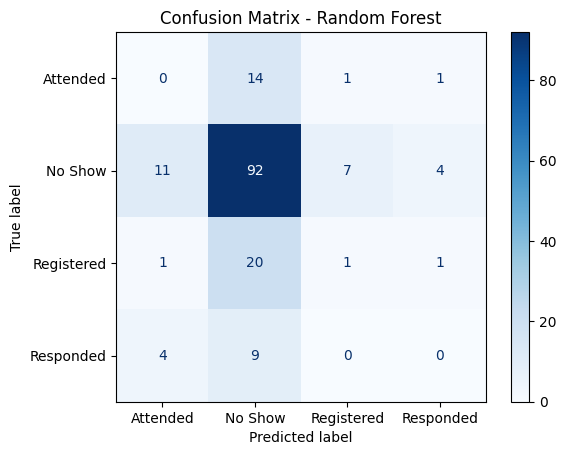

In [26]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix

#Binary Search
# class_names = ["Not Registered", "Registered"]
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
#Multi Variable
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)


disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [27]:
# Get feature importances from trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display feature importance
print(feature_importance_df)

# Intial iteration Binary Classification

#            Feature  Importance
# 5            Month    0.270779
# 0          Country    0.246601
# 1    Opt-In Source    0.226691
# 3  Season_Filtered    0.144445
# 4             Role    0.056092
# 2  Prospect Source    0.055391

# Intial iteration Multi Class Classification
#            Feature  Importance
# 5            Month    0.266630
# 0          Country    0.255162
# 1    Opt-In Source    0.222538
# 3  Season_Filtered    0.144650
# 4             Role    0.061962
# 2  Prospect Source    0.049057

               Feature  Importance
2                Month    0.373129
0              Country    0.356130
3  New Prospect Source    0.135960
1      Season_Filtered    0.134781


**K-Folding**

Stratified Cross-Validation Scores: [0.53614458 0.56626506 0.58433735 0.58433735 0.59036145]
Mean Accuracy: 0.5723
Standard Deviation: 0.0198
              precision    recall  f1-score   support

           0       0.10      0.05      0.07        99
           1       0.66      0.83      0.73       551
           2       0.18      0.10      0.13       108
           3       0.12      0.04      0.06        72

    accuracy                           0.57       830
   macro avg       0.26      0.26      0.25       830
weighted avg       0.48      0.57      0.52       830



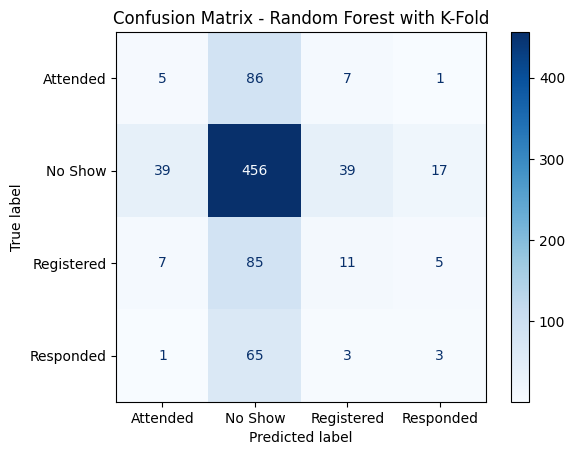

In [28]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

# Define Stratified K-Fold (Ensures each fold has balanced class distribution)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=skf, scoring="accuracy")

# Train and get cross-validated predictions
y_pred_kfold = cross_val_predict(model, X, y, cv=skf)


# Print results
print(f"Stratified Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


# Print classification report (Precision, Recall, F1-Score)
print(classification_report(y, y_pred_kfold))

# Generate confusion matrix
cm = confusion_matrix(y, y_pred_kfold)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Random Forest with K-Fold")
plt.show()

# Iteration Multi Class Classifier
# Stratified Cross-Validation Scores: [0.59162304 0.60209424 0.58638743 0.62303665 0.58947368]
# Mean Accuracy: 0.5985
# Standard Deviation: 0.0133
#               precision    recall  f1-score   support

#            0       0.07      0.03      0.04       113
#            1       0.67      0.87      0.76       633
#            2       0.23      0.10      0.14       124
#            3       0.14      0.06      0.08        84

#     accuracy                           0.60       954
#    macro avg       0.28      0.26      0.25       954
# weighted avg       0.50      0.60      0.53       954

In [29]:
# Previous model performance (before K-Fold)
print("Previous Model (Without K-Fold)")
print(classification_report(y_test, y_pred))

# K-Fold model performance
print("K-Fold Model Performance")
print(classification_report(y, y_pred_kfold))

Previous Model (Without K-Fold)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.68      0.81      0.74       114
           2       0.11      0.04      0.06        23
           3       0.00      0.00      0.00        13

    accuracy                           0.56       166
   macro avg       0.20      0.21      0.20       166
weighted avg       0.48      0.56      0.52       166

K-Fold Model Performance
              precision    recall  f1-score   support

           0       0.10      0.05      0.07        99
           1       0.66      0.83      0.73       551
           2       0.18      0.10      0.13       108
           3       0.12      0.04      0.06        72

    accuracy                           0.57       830
   macro avg       0.26      0.26      0.25       830
weighted avg       0.48      0.57      0.52       830



**Statistical Checkings**

In [30]:
def cramers_v(x, y):
    """Calculates Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Apply Cramér's V for all categorical features
cramers_results = {col: cramers_v(df_cleaned[col], df_cleaned["Prospect Status"]) for col in X.columns}

# Convert to DataFrame and sort by importance
cramers_df = pd.DataFrame(cramers_results.items(), columns=["Feature", "Cramér's V"])
cramers_df = cramers_df.sort_values(by="Cramér's V", ascending=False)
print(cramers_df.head(10))  # Show top 10 features

               Feature  Cramér's V
0              Country    0.142342
1      Season_Filtered    0.102349
2                Month    0.086036
3  New Prospect Source    0.037239


In [31]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y, discrete_features=True)

# Convert to DataFrame
mi_df = pd.DataFrame({"Feature": X.columns, "Mutual Information": mi_scores})
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)

print(mi_df.head(10))  # Show top 10 features

               Feature  Mutual Information
0              Country            0.032777
1      Season_Filtered            0.017248
2                Month            0.011660
3  New Prospect Source            0.001949


In [32]:
from sklearn.feature_selection import chi2
import pandas as pd

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Compute chi-square scores
chi_scores, p_values = chi2(X_encoded, y)

# Convert to DataFrame for better readability
chi2_results = pd.DataFrame({"Feature": X_encoded.columns, "Chi2 Score": chi_scores, "p-value": p_values})

# Sort by importance
chi2_results = chi2_results.sort_values(by="Chi2 Score", ascending=False)
print(chi2_results.head(10))  # Show top 10 most important categorical features

               Feature  Chi2 Score   p-value
1      Season_Filtered    3.239499  0.356152
0              Country    3.131241  0.371830
3  New Prospect Source    0.425347  0.934958
2                Month    0.202208  0.977232


**Adjust Class Weights in the Model**

In [33]:
model = RandomForestClassifier(n_estimators=100, class_weight={0: 1, 1: 5}, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5843373493975904
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.70      0.84      0.76       114
           2       0.11      0.04      0.06        23
           3       0.00      0.00      0.00        13

    accuracy                           0.58       166
   macro avg       0.20      0.22      0.21       166
weighted avg       0.49      0.58      0.53       166



In [34]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Split data
X = df_.drop(columns=["Prospect Status"])
y = df_["Prospect Status"]


# Convert all columns to numeric if not already
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)
    if X[col].dtype == 'object':
      try:
        X[col]=pd.to_numeric(X[col])
      except:
        print(f"Column {col} has values that are non-numeric and could not be converted. SMOTE will fail")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For Multi Class Classifier
# Determine the desired number of samples per class. We will aim to have at least 100 samples of each
target_counts = Counter(y_train)
sampling_strategy = {k: max(100, v) for k, v in target_counts.items()}  # Ensure at least 100 samples per class


smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5421686746987951
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.67      0.78      0.72       114
           2       0.11      0.04      0.06        23
           3       0.00      0.00      0.00        13

    accuracy                           0.54       166
   macro avg       0.20      0.21      0.20       166
weighted avg       0.48      0.54      0.51       166



**Logistic Regression**


In [35]:
# Train a logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.69      1.00      0.81       114
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        13

    accuracy                           0.69       166
   macro avg       0.17      0.25      0.20       166
weighted avg       0.47      0.69      0.56       166



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**XGBoost**

In [36]:
# Split dataset
X = df_.drop(columns=["Prospect Status"])
y = df_["Prospect Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define XGBoost model for multi-class classification
xgb_model = xgb.XGBClassifier(objective="multi:softmax", num_class=4, eval_metric="mlogloss", random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

    Attended       0.15      0.10      0.12        20
     No Show       0.66      0.79      0.72       110
  Registered       0.07      0.05      0.05        22
   Responded       0.29      0.14      0.19        14

    accuracy                           0.55       166
   macro avg       0.29      0.27      0.27       166
weighted avg       0.49      0.55      0.52       166



In [37]:
# Apply SMOTE to balance the dataset

# Convert all columns to numeric if not already
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)
    if X[col].dtype == 'object':
      try:
        X[col]=pd.to_numeric(X[col])
      except:
        print(f"Column {col} has values that are non-numeric and could not be converted. SMOTE will fail")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train XGBoost on balanced data
xgb_smote = xgb.XGBClassifier(objective="multi:softmax", num_class=4, eval_metric="mlogloss", random_state=42)
xgb_smote.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_smote = xgb_smote.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_smote, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

    Attended       0.10      0.12      0.11        16
     No Show       0.69      0.67      0.68       114
  Registered       0.12      0.09      0.10        23
   Responded       0.00      0.00      0.00        13

    accuracy                           0.48       166
   macro avg       0.23      0.22      0.22       166
weighted avg       0.50      0.48      0.49       166



In [38]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.3],
    "n_estimators": [50, 100, 200],
    "subsample": [0.8, 1],
}

# Perform Grid Search
xgb_grid = GridSearchCV(xgb.XGBClassifier(objective="multi:softmax", num_class=4, eval_metric="mlogloss", random_state=42),
                         param_grid, cv=3, scoring="accuracy", verbose=2, n_jobs=-1)

xgb_grid.fit(X_train_smote, y_train_smote)

# Best model
best_xgb = xgb_grid.best_estimator_
y_pred_best = best_xgb.predict(X_test)

# Evaluate
print("Best Parameters:", xgb_grid.best_params_)
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

    Attended       0.04      0.06      0.05        16
     No Show       0.68      0.61      0.64       114
  Registered       0.06      0.04      0.05        23
   Responded       0.00      0.00      0.00        13

    accuracy                           0.43       166
   macro avg       0.20      0.18      0.19       166
weighted avg       0.48      0.43      0.45       166

